## Лабораторная работа 1. Python. Решающие деревья.

## Группа: РИМ-211060

### ФИО студентов:
#### Степаненко Дмитрий Владимирович
#### Стойчин Красимир Людмилов

## 0. Цель работы: изучить основы алгоритмов построения деревьев в контексте рещения задачи "Ирисы Фишера.

### Теория:
В машинном обучение дерево строят по выборке.

Построение оптимального дерева – NP-трудная задача [Hyafil L., Rivest R.L., 1976]

Обычно применяют жадный рекурсивный алгоритм. Очередное разбиение (split) строят так, чтобы по возможности максимально уменьшить неоднородность (impurity).

### Популярные алгоритмы построения дерева:
- See5/C5.0 [Quinlan et., 1997] ← C4.5 [Quinlan, 1993] ← ID3 [Quinlan, 1979] ← CLS [Hunt & Marin & Stone & 1966]
- Classification and Regression Trees [Breiman & Friedman & Olshen & Stone, 1984] ← CHAID [Kass, 1980] ← THAID [Morgan & Messenger 1973] ← AID [Morgan & Sonquist, 1963]

– это жадные рекурсивные алгоритмы, на каждом шаге разбивающие очередной ящик, чтобы добиться максимального уменьшения взвешенной неоднородности:

### Алгоритм CART:
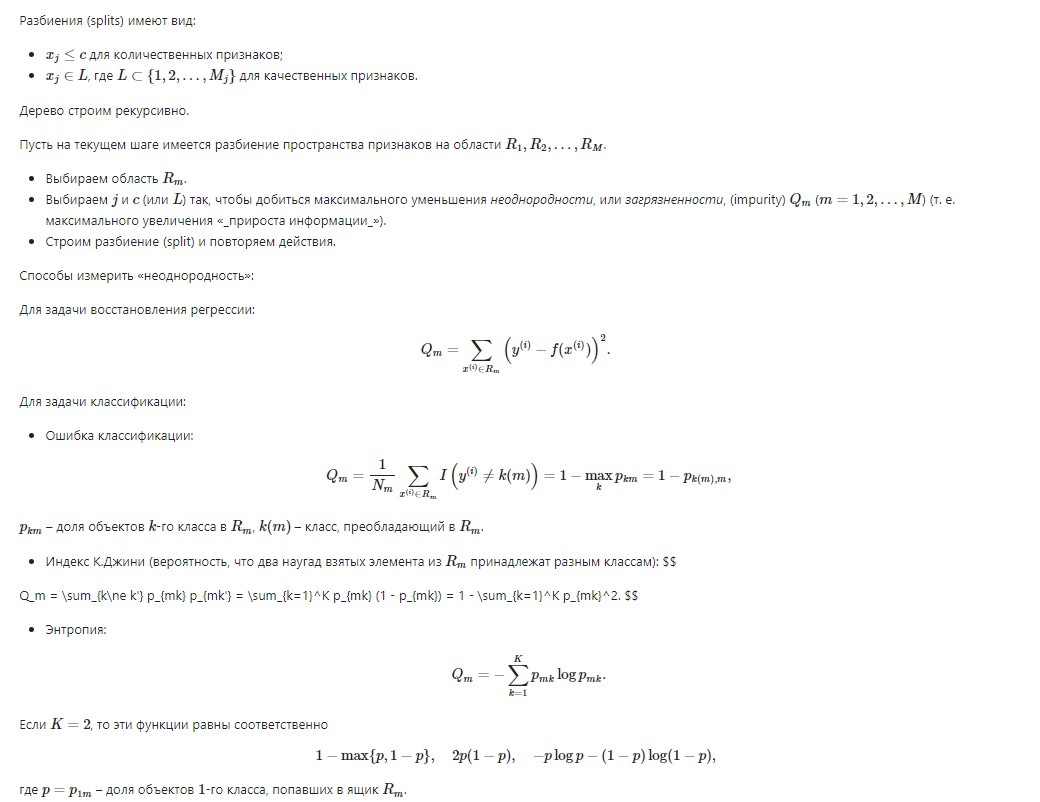

## 1. Сначала импортируем в свой код нужные библиотеки, функции и т.д.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## 2. Ирисы Фишера:

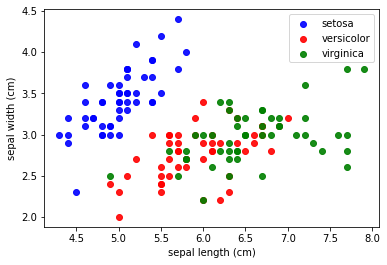

In [84]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
y_names = iris.target_names
feature_names = iris.feature_names

j1 = 0
j2 = 1

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

plt.legend(loc = 'best')

In [85]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [86]:
X = X[:, [j1, j2]]

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier()

In [87]:
tree_model.predict([[7.5, 3.0]])

array([2])

## 3. Рисуем дерево:

In [88]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot', feature_names = [feature_names[j1], feature_names[j2]])   
!dot -Tpng iris_tree.dot -o iris_tree.png

## 4. Сгенерированные данные:

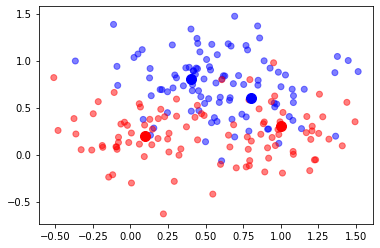

In [89]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

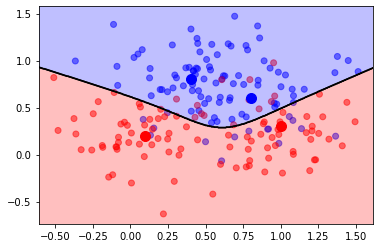

In [90]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [91]:
X_test, y_test = mysk.generate_points(seed = 1)

In [92]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier()

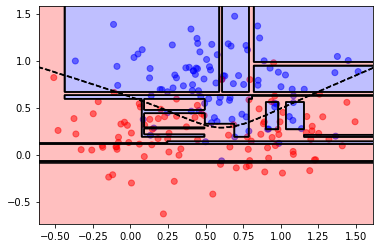

In [93]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(tree_model)
mysk.draw_bayes()

In [94]:
err_train = np.mean(y != tree_model.predict(X))
err_test = np.mean(y_test != tree_model.predict(X_test))
print(err_train, err_test)

0.0 0.27


## Достоинства и недостатки деревьев решений:

### Достоинства:

- Поддерживают работу с входными переменными разных (смешанных) типов (не реализовано в sklearn);
- Возможность обрабатывать данные с пропущенными значениями (не реализовано в sklearn);
- Достаточно устойчивы к выбросам;
- Нечувствительность к монотонным преобразованиям входных переменных;
- Поддерживают работу с большими выборками;
- Возможность интерпретации построенного решающего правила (если дерево не очень глубокое);
- Возможность определения значимости признаков.

### Недостатки:

- Многие алгоритмы, основанные на деревьях решений «пасуют» перед простыми распределениями (например, xor);
- Основной недостаток — плохая предсказательная (обобщающая) способность.